In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-poster')

In [4]:
cells = [50, 75, 100, 125, 150, 175, 200]
ncells = len(cells)

peaks = [100, 250, 500, 1000, 2500]
npeaks = len(peaks)

init_test = 1

nsims_per_condition = 1

nsims = 25

a = np.ones(nsims) #1. * np.ones((1,1))
b = np.ones(nsims) #1. * np.ones((1,1))
mu = np.ones(nsims) #1. * np.ones((1,))
ajj = np.ones(nsims)
bjj = np.ones(nsims)
epsilon = 60.

In [5]:
learned_a = np.zeros((nsims, ncells, npeaks, init_test))
learned_b = np.zeros((nsims, ncells, npeaks, init_test))
learned_mu = np.zeros((nsims, ncells, npeaks, init_test))
learned_ajj = np.zeros((nsims, ncells, npeaks, init_test))
learned_bjj = np.zeros((nsims, ncells, npeaks, init_test))

In [6]:
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz')
    learned_a[i] = dat['a'][:,:,0,:,0,0]
    learned_b[i] = dat['b'][:,:,0,:,0,0]
    learned_mu[i] = dat['mu'][:,:,0,:,0]
    learned_ajj[i] = dat['ajj'][:,:,0,:,0]
    learned_bjj[i] = dat['bjj'][:,:,0,:,0]
    
    a[i] = dat['true_a']
    b[i] = dat['true_b']
    mu[i] = dat['true_mu']
    ajj[i] = dat['true_ajj']
    bjj[i] = dat['true_bjj']

In [7]:
cis = np.zeros((nsims, ncells, npeaks, 5))
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz')
    cis[i] = dat['cis'][:,:,0,0,:]

In [8]:
fontsize = 24
capsize = 5
capthick = 1
elinewidth = 1
pltlinewidth = 1

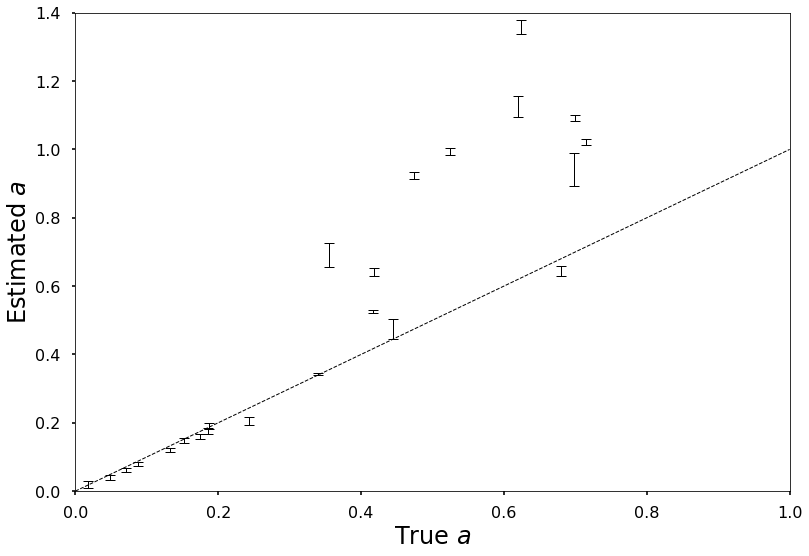

In [9]:
plt.errorbar(a, learned_a[:,-1,-1,0], fmt = 'none', yerr = cis[:,-1,-1,1], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth, label = '2500 peaks')

plt.xlabel('True $a$', fontsize = fontsize)
plt.ylabel('Estimated $a$', fontsize = fontsize)
plt.plot([0,1],[0,1], 'k--', linewidth = pltlinewidth)
plt.xlim([0,1])
plt.ylim([0,1.4])
#plt.legend()
#plt.show()
plt.savefig('scatter-with-cis-a.pdf')

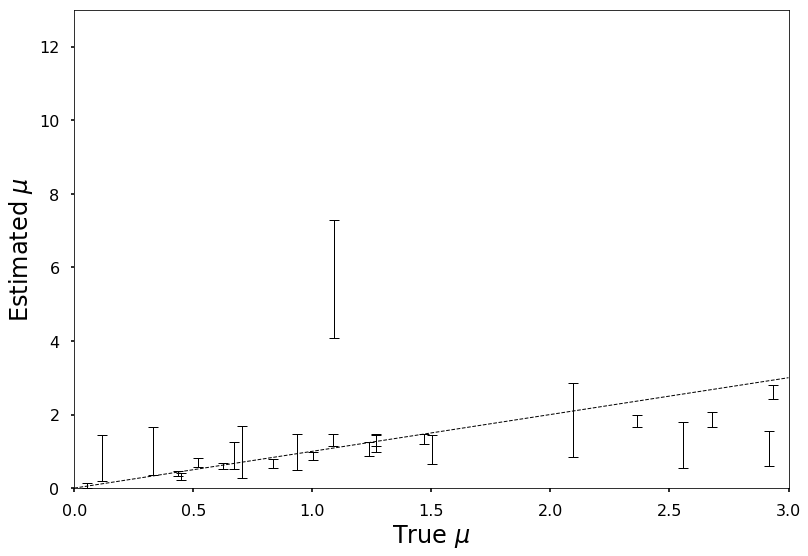

In [10]:
plt.errorbar(mu, learned_mu[:,-1,-1,0], fmt = 'none', yerr = cis[:,-1,-1,0], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $\mu$', fontsize = fontsize)
plt.ylabel('Estimated $\mu$', fontsize = fontsize)
plt.plot([0,3],[0,3], 'k--', linewidth = pltlinewidth)
plt.xlim([0,3])
plt.ylim([0,13])
plt.savefig('scatter-with-cis-mu.pdf')

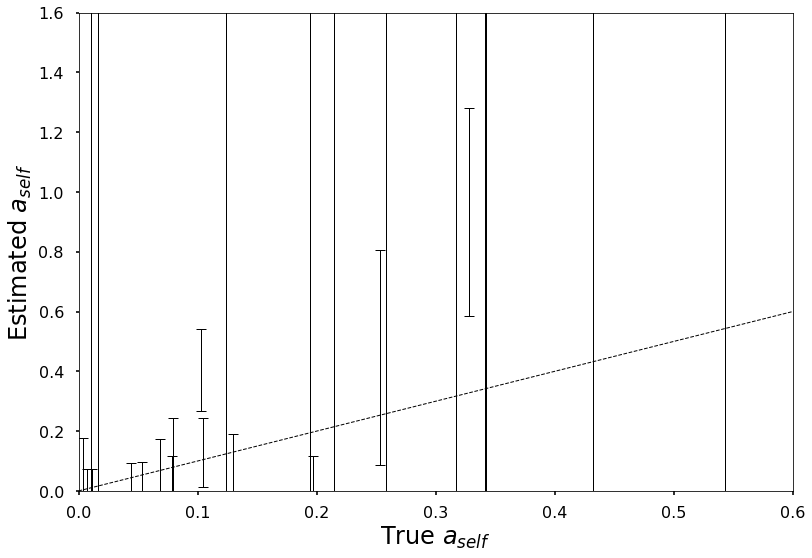

In [11]:
plt.errorbar(np.multiply(ajj,a), np.multiply(learned_ajj[:,-1,-1,0], learned_a[:,-1,-1,0]), fmt = 'none', yerr = cis[:,-1,-1,2], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $a_{self}$', fontsize = fontsize)
plt.ylabel('Estimated $a_{self}$', fontsize = fontsize)
plt.plot([0,.6],[0,.6], 'k--', linewidth = pltlinewidth)
plt.xlim([0,.6])
plt.ylim([0,1.6])
#plt.show()
plt.savefig('scatter-with-cis-ajj.pdf')

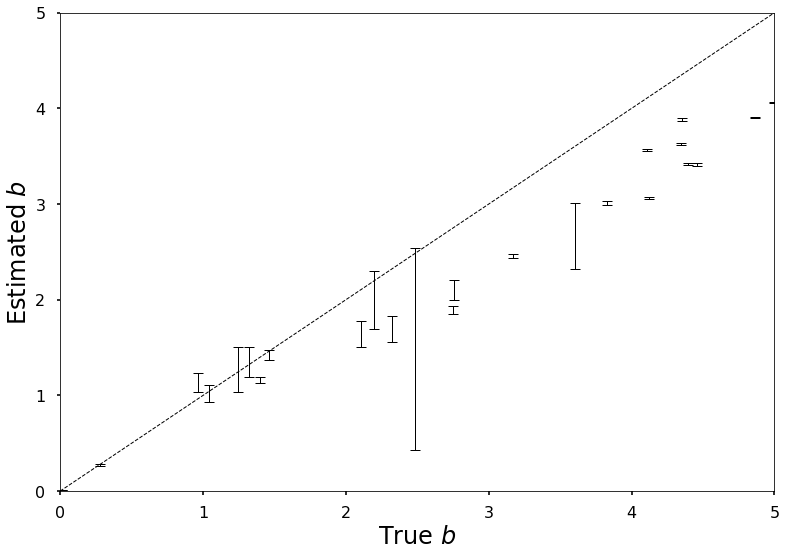

In [12]:
plt.errorbar(b, learned_b[:,-1,-1,0], fmt = 'none', yerr = cis[:,-1,-1,3], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $b$', fontsize = fontsize)
plt.ylabel('Estimated $b$', fontsize = fontsize)
plt.plot([0,5],[0,5], 'k--', linewidth = pltlinewidth)
plt.xlim([0,5])
plt.ylim([0,5])
#plt.show()
plt.savefig('scatter-with-cis-b.pdf')

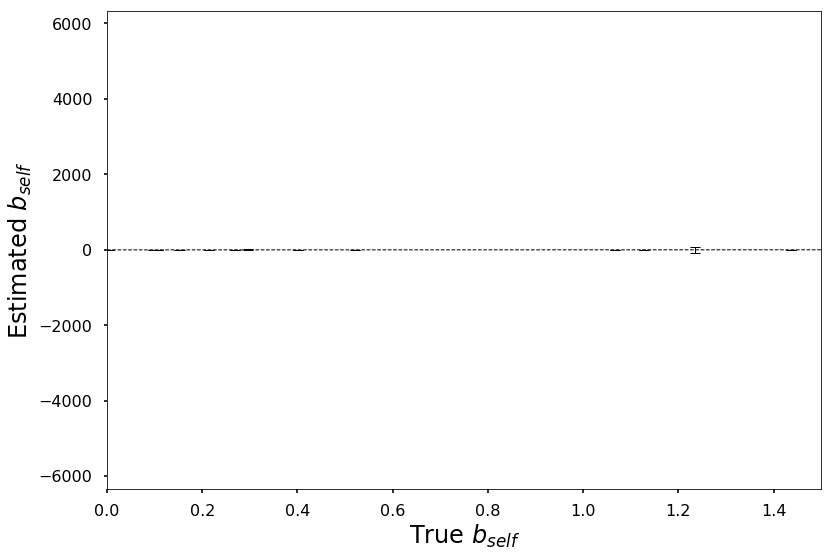

In [13]:
plt.errorbar(np.multiply(bjj,b), np.multiply(learned_bjj[:,-1,-1,0],learned_b[:,-1,-1,0]) , fmt = 'none', yerr = cis[:,-1,-1,4], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $b_{self}$', fontsize = fontsize)
plt.ylabel('Estimated $b_{self}$', fontsize = fontsize)
plt.plot([0,1.5],[0,1.5], 'k--', linewidth = pltlinewidth)
plt.xlim([0,1.5])
#plt.ylim([0,])
#plt.show()
plt.savefig('scatter-with-cis-bjj.pdf')

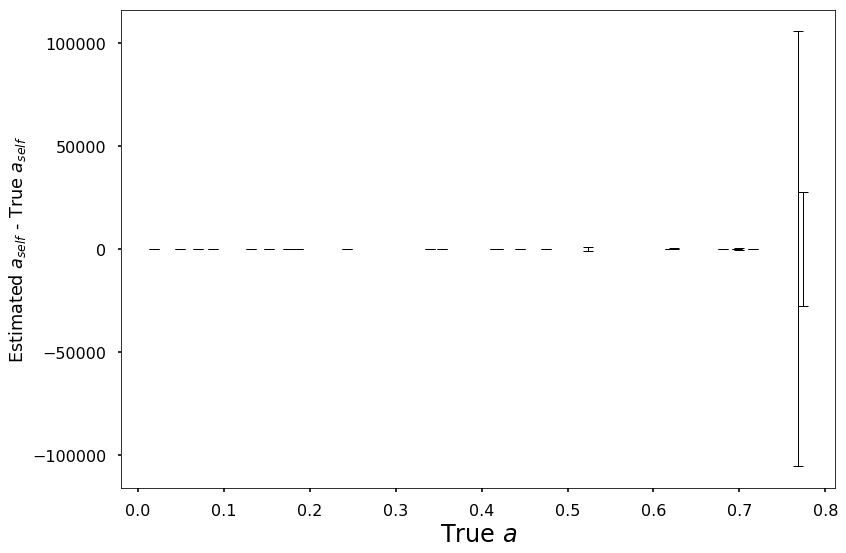

In [14]:
plt.errorbar(a, np.multiply(learned_ajj[:,-1,-1,0], learned_a[:,-1,-1,0]) - np.multiply(ajj,a), fmt = 'none', yerr = cis[:,-1,-1,2], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $a$', fontsize = fontsize)
plt.ylabel('Estimated $a_{self}$ - True $a_{self}$')
plt.show()

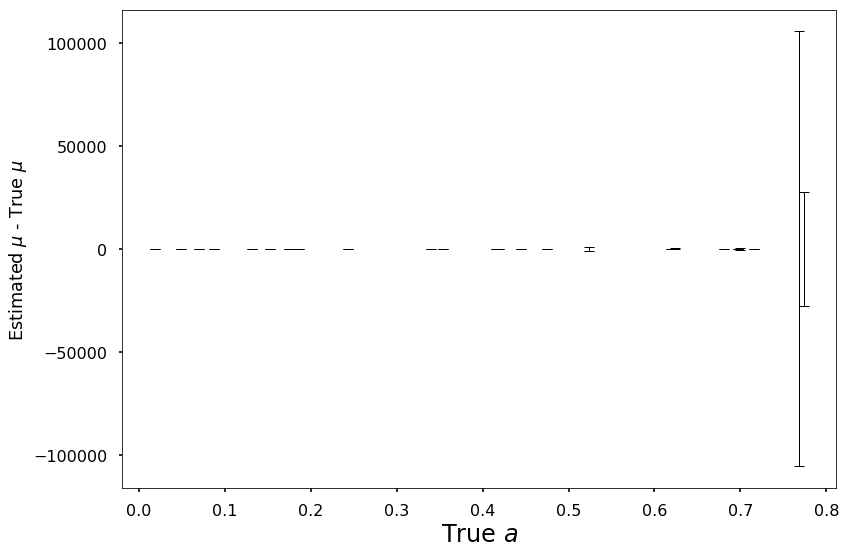

In [15]:
plt.errorbar(a, learned_mu[:,-1,-1,0], fmt = 'none', yerr = cis[:,-1,-1,2], 
             capsize = capsize, capthick = capthick, ecolor = 'k', elinewidth = elinewidth)
plt.xlabel('True $a$', fontsize = fontsize)
plt.ylabel('Estimated $\mu$ - True $\mu$')
plt.show()

## Normalized MSE

In [35]:
a_err = learned_a - np.expand_dims(a, (1,2,3))
b_err = learned_b - np.expand_dims(b, (1,2,3))
mu_err = learned_mu - np.expand_dims(mu, (1,2,3))
ajj_err = learned_ajj - np.expand_dims(np.multiply(ajj,a), (1,2,3))
bjj_err = learned_bjj - np.expand_dims(np.multiply(bjj,b), (1,2,3))

In [17]:
print('NMSE a')
print(np.mean(np.square(a_err))/np.square(np.max(a) - np.min(a)))

NMSE a
0.3163892269078997


In [18]:
print('STD a')
print(np.std(a_err)/(np.max(a) - np.min(a)))

STD a
0.41277981026075117


In [19]:
print('NMSE b')
print(np.mean(np.square(b_err))/np.square(np.max(b) - np.min(b)))

NMSE b
0.04773985809181032


In [20]:
print('STD b')
print(np.std(b_err)/(np.max(b) - np.min(b)))

STD b
0.14778844733926103


In [21]:
print('NMSE mu')
print(np.mean(np.square(mu_err))/np.square(np.max(mu) - np.min(mu)))

NMSE mu
0.27249175937746845


In [22]:
print('STD mu')
print(np.std(mu_err)/(np.max(mu) - np.min(mu)))

STD mu
0.520611033812645


In [37]:
print('NMSE ajj')
print(np.mean(np.square(ajj_err))/(np.max(np.multiply(ajj, a)) - np.min(np.multiply(ajj, a))))

NMSE ajj
0.767668190288999


In [36]:
print('STD ajj')
print(np.std(ajj_err)/(np.max(np.multiply(ajj, a)) - np.min(np.multiply(ajj, a))))

STD ajj
0.4581767347103489


In [38]:
print('NMSE bjj')
print(np.mean(np.square(bjj_err))/(np.max(np.multiply(bjj, b)) - np.min(np.multiply(bjj, b))))

NMSE bjj
0.6053581151738818


In [39]:
print('STD bjj')
print(np.std(bjj_err)/(np.max(np.multiply(bjj, b)) - np.min(np.multiply(bjj, b))))

STD bjj
0.29313527949658397


## Control models

In [27]:
control_mu = np.zeros((nsims,7,5))
#dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
    for j in range(7):
        for k in range(5):
            traces = dat['peaks'][j,k]
            tpeaks = 0
            for c in range(len(traces)):
                tpeaks += len(traces[c])
            control_mu[i,j,k] = tpeaks/(np.max(np.hstack(traces)) * cells[j])

In [28]:
control_mu_err = control_mu - np.expand_dims(mu, (1,2))

In [29]:
print('NMSE control mu')
print(np.mean(np.square(control_mu_err))/(np.square(np.max(mu) - np.min(mu))))

NMSE control mu
3018.5510848275358


In [30]:
print('NSTD control mu')
np.std(control_mu_err)/(np.max(mu) - np.min(mu))

NSTD control mu


51.59277283944117

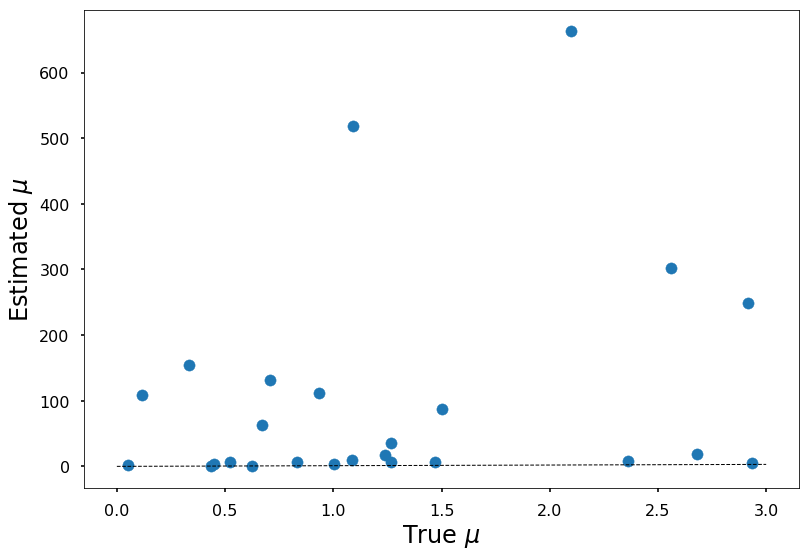

In [31]:
plt.scatter(mu, control_mu[:,-1,-1])
plt.xlabel('True $\mu$', fontsize = fontsize)
plt.ylabel('Estimated $\mu$', fontsize = fontsize)
plt.plot([0,3],[0,3], 'k--', linewidth = pltlinewidth)
#plt.xlim([0,3])
#plt.ylim([0,13])
plt.show()

In [32]:
control_ajj = np.zeros((nsims,7,5))
#dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
    for j in range(7):
        for k in range(5):
            traces = dat['peaks'][j,k]
            
            t = dat['t'][j,k,0]     
            excess_peaks_per_time = 0
            for c in range(len(traces)):
                excess_peaks_per_time += (len(traces[c])/t) - mu[i]
            control_ajj[i,j,k] = excess_peaks_per_time/cells[j]

In [33]:
plt.scatter(np.multiply(ajj, a)[mask], control_ajj[mask,-1,-1], s = 5)
plt.xlabel('True $a_{self}$', fontsize = fontsize)
plt.ylabel('Estimated $a_{self}$', fontsize = fontsize)
plt.plot([0,0.6],[0,0.6], 'k--', linewidth = pltlinewidth)
#plt.xlim([0,3])
#plt.ylim([0,13])
plt.show()

NameError: name 'mask' is not defined

In [ ]:
def est_bjj_init(peaks):
        count = 0
        total = 0
        for i in range(len(peaks)):
            if len(peaks[i]) > 1:
                count += len(peaks[i])
                total += np.sum(np.diff(peaks[i]))
            else:
                pass
        if count == 0:
            count = 1.
            total = 1.
        mean = np.divide(total, count)
        if np.log(mean) < 0:
            sig_est = np.sqrt(-np.log(mean))
        else:
            sig_est = np.sqrt(2 * np.log(mean))
        return sig_est

In [ ]:
control_bjj = np.zeros((nsims,7,5))
#dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
    for j in range(7):
        for k in range(5):
            traces = dat['peaks'][j,k]
            
            control_bjj[i,j,k] = est_bjj_init(traces)

In [ ]:
plt.scatter(np.multiply(b[mask],bjj[mask]), control_bjj[mask,-1,-1], s = 5)
plt.xlabel('True $b_{self}$', fontsize = fontsize)
plt.ylabel('Estimated $b_{self}$', fontsize = fontsize)
plt.plot([0,3],[0,3], 'k--', linewidth = pltlinewidth)
#plt.xlim([0,3])
#plt.ylim([0,13])
plt.show()

In [ ]:
from scipy.spatial.distance import pdist, squareform

def est_b(peaks, coords, epsilon = 60.):
    
    d = squareform(pdist(coords))
    adj = np.logical_and(d < epsilon, d != 0)
    
    adj_half = np.triu(adj)
    
    n1, n2 = np.where(adj_half)
    
    count = 0
    total = 0
    
    for i in range(len(n1)):
        
        peaks1 = peaks[n1[i]]
        len1 = len(peaks1)
        
        peaks2 = peaks[n2[i]]
        len2 = len(peaks2)
        
        if (len1 == 0) or (len2 == 0):
            continue

        peaks1_repeat = np.repeat(np.expand_dims(peaks1,1), len2, axis = 1)
        peaks2_repeat = np.repeat(np.expand_dims(peaks2,1).T, len1, axis = 0)
        
        pos_diff = np.clip(peaks1_repeat - peaks2_repeat, a_min = 0, a_max = None)
        
        count += np.sum(pos_diff > 0)
        total += np.sum(pos_diff)
        
    mean = count/total
    
    if np.log(mean) < 0:
        sig_est = np.sqrt(-np.log(mean))
    else:
        sig_est = np.sqrt(2 * np.log(mean))
        
    
    return sig_est

In [ ]:
control_b = np.zeros((nsims,7,5))
#dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
    for j in range(7):
        for k in range(5):
            traces = dat['peaks'][j,k]
            coords = dat['coords'][j,k]
            control_b[i,j,k] = est_b(traces, coords)

In [ ]:
plt.scatter(b[mask], control_b[mask,-1,-1], s = 25)
plt.xlabel('True $b$', fontsize = fontsize)
plt.ylabel('Estimated $b$', fontsize = fontsize)
plt.plot([0,5],[0,5], 'k--', linewidth = pltlinewidth)
#plt.xlim([0,3])
#plt.ylim([0,13])
plt.show()

In [ ]:
control_b_err = control_b[:,:,:] - np.expand_dims(b, (1,2,3))
print('NMSE b')
print(np.nanmean(np.square(control_b_err))/np.square(np.mean(b) * np.mean(control_b)))

In [ ]:
print(np.nanmean(np.std(control_b_err))/(np.mean(b) * np.mean(control_b)))

In [ ]:
def est_a(peaks, coords, mu, t, epsilon = 60.):
    
    d = squareform(pdist(coords))
    adj = np.logical_and(d < epsilon, d != 0)
    
    
    a = 0
    cs = 0
    for c in range(coords.shape[0]):
        
        nns = np.sum(adj[c,:])
        if nns > 0:
            cpeaks = len(peaks[c])
            excess_peaks_per_time = cpeaks/t - mu
            a += (excess_peaks_per_time/nns)
            cs += 1
        
    return a/cs
    

In [ ]:
control_a = np.zeros((nsims,7,5))
#dat = loadmat('/tigress/architv/drug-lfm/FINAL_EQ.mat')
for i in range(nsims):
    dat = np.load('learned-' + str(i+1) + '.npz', allow_pickle = True)
    for j in range(7):
        for k in range(5):
            traces = dat['peaks'][j,k]
            coords = dat['coords'][j,k]
            t = dat['t'][j,k,0]
            control_a[i,j,k] = est_a(traces, coords, mu[i], t)

In [ ]:
plt.scatter(a[mask], control_a[mask,-1,-1], s = 25)
plt.xlabel('True $a$', fontsize = fontsize)
plt.ylabel('Estimated $a$', fontsize = fontsize)
plt.plot([0,1],[0,1], 'k--', linewidth = pltlinewidth)
#plt.xlim([0,3])
#plt.ylim([0,13])
plt.show()

In [ ]:
control_a_err = control_a[:,:,:] - np.expand_dims(a, (1,2,3))
print('NMSE a')
print(np.nanmean(np.square(control_a_err))/np.square((np.max(a)) - np.min(a)))

In [ ]:
print(np.nanmean(np.std(control_a_err))/(np.max(a)) - np.min(a))

In [ ]:
control_ajj_err = control_ajj - np.expand_dims(np.multiply(ajj,a), (1,2,3))
control_bjj_err = control_bjj - np.expand_dims(np.multiply(bjj,b), (1,2,3))

In [ ]:
print('NMSE ajj')
print(np.mean(np.square(control_ajj_err))/(np.max(np.multiply(ajj, a)) - np.min(np.multiply(ajj, a))))

In [ ]:
print('STD ajj')
print(np.std(control_ajj_err)/(np.max(np.multiply(ajj, a)) - np.min(np.multiply(ajj, a))))

In [ ]:
print('NMSE bjj')
print(np.mean(np.square(control_bjj_err))/(np.max(np.multiply(bjj, b)) - np.min(np.multiply(bjj, b))))

In [ ]:
print('STD bjj')
print(np.std(control_bjj_err)/(np.max(np.multiply(bjj, b)) - np.min(np.multiply(bjj, b))))